<a href="https://colab.research.google.com/github/PC2102/MetricasRendimiento-HPC02/blob/main/Parcial01/2Parcial_Modelo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](./img/logo.png)

# 1er Parcial: Análisis Exploratorio de Datos. 


### Nombre Estudiante: Pedro Luis Cardenas Diaz
### Cédula de Ciudadanía: 1.000.698.238

# Modelo **01**

### Descripción de Valores:

    UNIQUE_ID: continuo.
    POSITION_TITLE: ASSISTANT DIRECTOR (EX LVL), LIBRARY ASSISTANT, DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV',
                    POLICE OFFICER, ENGINEER/OPERATOR, ELECTRICIAN, FIRE FIGHTER,
                    SENIOR POLICE OFFICER, ENGINEER, CARPENTER, AIRPORT OPERATIONS COORDINATOR,
                    ASSOCIATE EMS PHYSICIAN DIRECTOR, FIELD SUPERVISOR, ....
    DEPARTMENT: Municipal Courts Department', Library, Planning & Development, Convention and Entertainment,
                Houston Police Department-HPD, Houston Fire Department (HFD), Mayor's Office, 
                General Services Department, Public Works & Engineering-PWE, Admn. & Regulatory Affairs,
                Houston Airport System (HAS), Health & Human Services, Dept of Neighborhoods (DON), 
                Finance, 'Fleet Management Department, Solid Waste Management, 'Legal Department',
                City Council, 'Human Resources Dept.', Parks & Recreation, Housing and Community Devp.,
                Houston Emergency Center (HEC), Houston Information Tech Svcs, City Controller's Office.
    BASE_SALARY: continuo.             
    RACE: Hispanic/Latino, White, Black or African American, Asian/Pacific Islander,
          American Indian or Alaskan Native, Others.
    EMPLOYMENT_TYPE: Full Time, Part Time 30, Part Time, Temporary, HFD Deferred Term.
    GENGER: Female, Male.
    EMPLOYMENT_STATUS: Active, Inactive.
    HIRE_DATE: Fecha (Año-Mes-Día).
    JOB_DATE: Fecha (Año-Mes-Día).
    

## 0.- Bibliotecas y Lectura

In [1]:
# Se importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Se importa el dataset a un objeto dataframe y se visualiza
url = 'https://raw.githubusercontent.com/PC2102/MetricasRendimiento-HPC02/main/Parcial01/employee.csv'
df_employee = pd.read_csv(url, na_values=' ?')
df_employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [3]:
# Se visualiza los datos de el dataframe para observar si hay algun problema con los datos
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


Encontramos que el dataframe sufre una perdida de datos en las columnas de BASE_SALARY, RACE y JOB_DATE.

## 1.- Limpieza de los datos ( NaN)
    - Bonus: ¿Cuantas Filas se han eliminado después de la limpieza?

In [4]:
# Se procede a eliminar los valores desaparecidos
df_employee = df_employee.dropna()

df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          1853 non-null   int64  
 1   POSITION_TITLE     1853 non-null   object 
 2   DEPARTMENT         1853 non-null   object 
 3   BASE_SALARY        1853 non-null   float64
 4   RACE               1853 non-null   object 
 5   EMPLOYMENT_TYPE    1853 non-null   object 
 6   GENDER             1853 non-null   object 
 7   EMPLOYMENT_STATUS  1853 non-null   object 
 8   HIRE_DATE          1853 non-null   object 
 9   JOB_DATE           1853 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 159.2+ KB


Al realizar el dropeo de las filas que sufren una perdida de datos, se observa que ciertas columnas sufrieron una mayor perdida de datos comparadas a otras.

# **TABLA CON LA CANTIDAD DE FILAS PERDIDAS**
 **0   UNIQUE_ID**       ||   147  

 **1   POSITION_TITLE**  ||   147  

 **2   DEPARTMENT**    ||     147  

 **3   BASE_SALARY**    ||    33 

 **4   RACE**          ||     112
 
 **5   EMPLOYMENT_TYPE** ||   147
 
 **6  GENDER**       ||       147 

**7   EMPLOYMENT_STATUS** || 147  

 **8   HIRE_DATE**   ||       147
 
**9   JOB_DATE**   ||       144

Por medio de la tabla, observamos que la columna la cual perdio la menor cantidad de datos fue 'BASE_SALARY' perdiendo solo 33 datos, mientras que las columnas que perdieron la mayor cantidad de datos corresponden a 'UNIQUE_ID', 'POSITION_TITLE', 'DEPARTMENT', 'EMPLOYMENT_TYPE', 'GENDER', 'EMPLOYMENT_STATUS' y 'HIRE_DATE', todas estas columnas perdiendo 147 filas/datos.

Tras eliminar los datos NaN, el dataset cuenta con un total de 1853 datos.

## 2.- ¿Cuál es el promedio de BASE_SALARY? 
    - Agregue una nueva columna 'SALARY' con valores '<= valor promedio', '> valor promedio'
      Ejemplo: si el promedio es 34540, entonces la columna ['SALARY'] tendra dos valores ['<= 34k', '>34k']
    - Elimine la columna BASE_SALARY

<img src="./img/grafi02.png">

In [5]:
df_employee['BASE_SALARY'].mean()

56085.90771721533

In [6]:
df_employee['BASE_SALARY'].head()

0    121862.0
1     26125.0
2     45279.0
3     63166.0
4     56347.0
Name: BASE_SALARY, dtype: float64

El promedio de la columna 'BASE_SALARY' es de 56085.9 asi que procederemos a utilizar '<=56k' y '>56k' para la columna de 'SALARY'

In [7]:
df_employee['SALARY'] = df_employee['BASE_SALARY'].apply(lambda x:'<=56K' if x<=56000 else '>56K')
df_employee.drop('BASE_SALARY', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df_employee['SALARY'].head()

0     >56K
1    <=56K
2    <=56K
3     >56K
4     >56K
Name: SALARY, dtype: object

In [9]:
df_employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,SALARY
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,>56K
1,1,LIBRARY ASSISTANT,Library,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,<=56K
2,2,POLICE OFFICER,Houston Police Department-HPD,White,Full Time,Male,Active,2015-02-03,2015-02-03,<=56K
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),White,Full Time,Male,Active,1982-02-08,1991-05-25,>56K
4,4,ELECTRICIAN,General Services Department,White,Full Time,Male,Active,1989-06-19,1994-10-22,>56K


Se realizo la creacion de la columna 'SALARY' con los datos categoricos basados en el promedio de la columna 'BASE_SALARY' la cual fue eliminada tras su utilizacion en la creacion de la columna 'SALARY'.

## 3.- Añada una columna ['TOTAL_TIME_YEARS'] = ['JOB_DATE'] - ['HIRE_DATE']
        - Recuerde que son columnas formato FECHA (pd.to_datetime) 
        - Elimine las columnas ['JOB_DATE'], ['HIRE_DATE']

<img src="./img/grafi032.png">

In [10]:
df_employee['JOB_DATE'] = pd.to_datetime(df_employee['JOB_DATE'])
df_employee['HIRE_DATE'] = pd.to_datetime(df_employee['HIRE_DATE'])

In [11]:
df_employee['JOB_DATE'].head()

0   2012-10-13
1   2010-09-18
2   2015-02-03
3   1991-05-25
4   1994-10-22
Name: JOB_DATE, dtype: datetime64[ns]

In [12]:
df_employee['HIRE_DATE'].head()

0   2006-06-12
1   2000-07-19
2   2015-02-03
3   1982-02-08
4   1989-06-19
Name: HIRE_DATE, dtype: datetime64[ns]

In [13]:
df_employee['TOTAL_TIME_YEARS'] = (df_employee['JOB_DATE'] - df_employee['HIRE_DATE']).dt.days
df_employee.drop('HIRE_DATE', axis = 1, inplace=True)
df_employee.drop('JOB_DATE', axis = 1, inplace=True)

In [14]:
df_employee['TOTAL_TIME_YEARS'] = df_employee['TOTAL_TIME_YEARS']/365

In [15]:
df_employee['TOTAL_TIME_YEARS'].head()

0     6.342466
1    10.172603
2     0.000000
3     9.295890
4     5.345205
Name: TOTAL_TIME_YEARS, dtype: float64

## 4.- Elabore una gráfica que presente la cantidad de años trabajados del Empleado por raza y por Genero
      - ['TOTAL_TIME_YEARS'] ['RACE'] ['GENDER']

<img src="./img/grafi.png" style="width:450px">

In [16]:
df_employee['TOTAL_TIME_YEARS'].astype(int)

0        6
1       10
2        0
3        9
4        5
        ..
1995     1
1996    10
1997     1
1998     2
1999     1
Name: TOTAL_TIME_YEARS, Length: 1853, dtype: int64

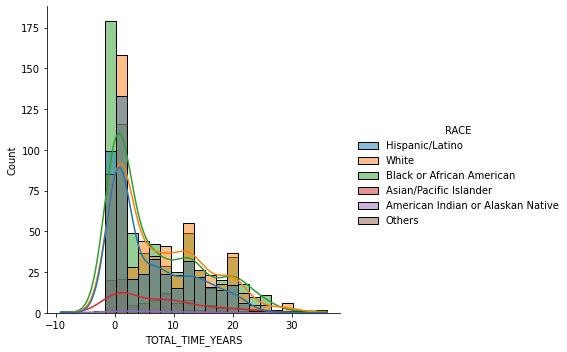

In [17]:
sns.displot(data = df_employee, x = 'TOTAL_TIME_YEARS', hue = 'RACE', kde = True)

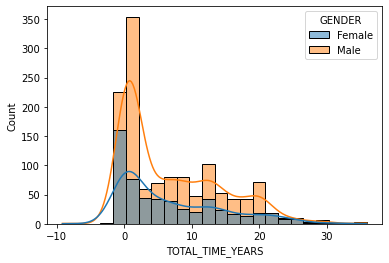

In [18]:
sns.histplot(data = df_employee, x = 'TOTAL_TIME_YEARS', hue = 'GENDER', kde = True)



*   En la tabla de Total_time_years vs Race observamos que el grupo etnico que se encuentra con 0 años de experiencia laboral son los Afro americanos
*   En la tabla de Total_time_years vs Gender observamos que hay una mayor cantidad de desempleados de genero masculino.
*   En la tabla de Total_time_years vs Race observamos que existen muy pocos datos recopilados en lo que respecta a Asiaticos e Indios.
* En la tabla de Total_time_years vs Race observamos que los Latinos y los Blancos poseen una linea cercana en lo que respecta a 0 años laborales.
* En la tabla de Total_time_years vs Race observamos que al finalizar la tabla, el grupo etnico que posee la mayor cantidad de años laborales tiende a ser los Blancos.



## 5.- ¿Cuántos hombres y mujeres ['GENDER'] están representados en el DataFrame?

In [19]:
df_employee['GENDER'].value_counts()

Male      1288
Female     565
Name: GENDER, dtype: int64

## 6.- ¿Cuál es el tiempo promedio ['TOTAL_TIME_YEARS']? 
        - ¿Tiempo Promedio de las mujeres?
        - ¿Tiempo Promedio de los hombres?

In [20]:
df_employee[["TOTAL_TIME_YEARS", "GENDER"]].groupby('GENDER').mean()

,TOTAL_TIME_YEARS
GENDER,
Female,6.817636
Male,6.895652


## 7.-  ¿Cuál es la proporción de empleados Hispanic/Latinos ['RACE']?
    - Bonus--> ¿Cuál es la proporción de Mujeres en el total del grupo de Hipanic/Latino

In [21]:
df_employee['RACE'].value_counts()['Hispanic/Latino']

461

In [22]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          1853 non-null   int64  
 1   POSITION_TITLE     1853 non-null   object 
 2   DEPARTMENT         1853 non-null   object 
 3   RACE               1853 non-null   object 
 4   EMPLOYMENT_TYPE    1853 non-null   object 
 5   GENDER             1853 non-null   object 
 6   EMPLOYMENT_STATUS  1853 non-null   object 
 7   SALARY             1853 non-null   object 
 8   TOTAL_TIME_YEARS   1853 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 209.3+ KB


In [23]:
x = 461/1853

In [24]:
xpercent = x * 100
print(xpercent)

24.878575283324338


x = 461/1853 = 0.2487

x% = 0.2487 * 100 = 24.87%

El porcentaje de Hispanic/Latino en el dataset es equivalente al 24.87%

In [25]:
df_employee['GENDER'].value_counts()['Female']

565

In [26]:
x = 565 * 0.2487
print(x)

140.5155


La cantidad de mujeres que pertenecen al grupo Hispanic/Latino es de 140 mujeres

## 8.- ¿Cuantos 'POLICE OFFICER' tienen salario por encima del promedio del salario?
    - Bonus--> ¿Cuantos 'POLICE OFFICER' son mujeres y cuantos hombres?

In [27]:
df_employee[["POSITION_TITLE", "SALARY"]].value_counts()['POLICE OFFICER']

SALARY
<=56K    154
>56K      30
dtype: int64

La cantidad de policias que tienen un salario mayor al promedio es de 154

In [28]:
df_employee[["POSITION_TITLE", "GENDER"]].value_counts()['POLICE OFFICER']

GENDER
Male      149
Female     35
dtype: int64

Existen 149 policias de genero masculino y 35 policias de genero femenino

## 9.- Presente los 2 empleados con más tiempo ['TOTAL_TIME_YEARS'] en el dataframe.

In [29]:
df_employee["TOTAL_TIME_YEARS"].nlargest(2)

1466    35.895890
807     35.643836
Name: TOTAL_TIME_YEARS, dtype: float64

Los empleados con el mayor tiempo empleado corresponde a los empleados con el UID 1466 y 807

# ================================================================================

#**Conclusiones**

* Se presento un dataset con enfoque al empleo
* Al dataset se le realizaron los correspondientes cambios requeridos
* Se encontraron en el dataset, variables categoricas y variables numericas
* Las variables numericas fueron analizadas: El proposito es revisar la relacion entre las variables y descartar aquellas que no influian o dererioraban las relaciones y remplazarlas por variables que cumplan una funcion especifica.
* Para el dataframe se elimino los datos desaparecidos o imposibles, dado que no estos datos representaban una problematica a la hora de realizar el analisis.
* La columna **BASE_SALARY** se elimino y se creo la columna categorica **SALARY** tomando en cuenta el promedio total.
* Finalmente, el dataframe quedo preprocesado con 7 variables  del tipo 'object', y 2 variables del tipo 'int64'.
